In [2]:
!pip install geopandas
!pip install mapclassify
!pip install contextily
!pip install geopy
!pip install libpysal
!pip install esda

!git clone https://github.com/dfbeltran/cursotomadecisiones.git

     |████████████████████████████████| 1.0 MB 7.6 MB/s 
     |████████████████████████████████| 6.3 MB 27.5 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 
     |████████████████████████████████| 19.3 MB 26 kB/s 
     |████████████████████████████████| 2.4 MB 6.6 MB/s 
     |████████████████████████████████| 95 kB 3.3 MB/s 
  Created wheel for esda: filename=esda-2.4.1-py3-none-any.whl size=117429 sha256=2aea7852acede049ffd2352aa53ceb6d791fdf7d8b93f06a1ecd93fa0c7ac85f
  Stored in directory: /root/.cache/pip/wheels/ed/67/c5/4558a178be4c410f341c31f71b5aba9c761a40c9d17dbdfddd
Successfully built esda
Cloning into 'cursotomadecisiones'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 82 (delta 27), reused 65 (delta 13), pack-reused 0
Unpacking objects: 100% (82/82), done.


# Fuentes de datos no tradicionales

## 1. Introducción

Es usual que la primera aproximación al análisis de datos se de por la necesidad de entender el comportamiento de un grupo de individuos que se caracterizan a partir de un conjunto de variables. Por ejemplo, la Gran Encuesta Integrada de Hogares (GEIH), desarrollada por el Departamento Administrativo Nacional de Estadística (DANE), captura información a nivel nacional sobre:

* Viviendas: ubicación, tipo y características físicas como materiales de paredes y pisos.
* Hogares: disponibilidad de servicios públicos, privados y comunales, valor pagado y calidad de estos, lugar y energía utilizada para preparar alimentos, tipo de tenencia de la vivienda y tenencia de bienes en el hogar.
* Personas: sexo, edad, parentesco, estado civil, seguridad social en salud, educación, caracteristicas laborales y migración.

Esta información, y mucha de la que normalmente se utliza en el análisis de datos, suele representar al individuo por filas y sus caracter´ısticas por columnas. Adem´as, en muchos casos es posible encontrar entre las variables que definen al individuo datos sobre el lugar con el cual se relaciona, en forma de país, región, ciudad, barrio, parcela, latitud y longitud, etc., añadiendo así un componente espacial que vale la pena aprovechar. Aquí, es importante mencionar que la ubicación no altera la estructura de los datos, donde cada fila sigue representando un individuo y cada columna una variable.

Por su parte, puede suceder que las filas de un conjunto de información representen una relación, como por ejemplo una transacción, un trayecto o un vínculo social, mientras que las columnas indican las características de esta relación, incluyendo las partes que intervienen en la misma. De esta manera, la información tiene una estructura de red que puede aprovecharse para generar conocimiento sobre los indivudos y sus relaciones.

Tomando en consideración lo anterior, esta sección del curso presentaría algunas de las tareas del análisis de información espacial y de vínculos, junto con las metodolog´ıas que apoyan estos tipos de estudios. También, y en primera instancia, se haría una discusión sobre el análisis descriptivo y predictivo.

## 2. Análisis descriptivo, predictivo y prescriptivo

En general, existen tres tipos de análisis: descriptivo, predictivo y prescriptivo. El análisis descriptivo
busca presentar en un lenguaje entendible el resumen de diferentes situaciones que pueden estar presentes
en los datos, pero que no son fáciles de ver sin que exista un procesamiento de por medio. Así, una medida
de tendencia central (promedio, mediana, moda) o de dispersión (varianza, coeficiente de variación) puede
informar sobre el comportamiento de los individuos en torno a una característica determinada. En el caso
multivariado, una correlación indica la asociación entre dos o más variables (o entre dos o más individuos),
y un coeficiente de regresión indica cuanto cambia una variable de interés por cambios en otra variable que
se cree la afecta, manteniendo otras características constantes

Por su parte, el análisis predictivo se preocupa por generar información sobre situaciones que no han sido
observadas aún, como cuando se quiere saber a qué grupo debe asignarse un nuevo individuo, o cuando se
desea conocer el valor de una variable de interés en algún momento futuro.

Finalmente, el análisis prescriptivo pretende dar recomendaciones sobre diferentes alternativas de acción,
informando sobre el resultado mas probable para cada decisión. Para esto se necesita información sobre las
alternativas disponibles y un sistema de retroalimentación que registre el resultado generado por la acción
que se haya tomado.

En esta sección trabajaremos sobre el análisis descriptivo, mientras que posteriormente en el curso nos
ocuparemos de la predicción (y tangencialmente del pronóstico).

## 3. Análisis espacial

### 3.1. Información espacial y su representación gráfica 

Normalmente las caracteristicas de ubicación de un individuo no son suficientes para su análisis geográfico, sino que se necesita, además, de una infraestrucutra que permita referenciar al  individuo con su entorno y en relación con los demás casos observados en el conjunto de datos que se esté trabajando. Es así que se necesita contar con mapas (digitales), los cuales pueden ser de diferentes tipos:

*Líneas: cada una de las unidades ocupa un espacio en 2 dimensiones, que está representado por su
contorno.
* Puntos: cada una de las unidades ocupa un punto en el espacio.
* Polígonos: visualmente muy similar al mapa de líneas, pero en este caso las unidades están representadas por el área que ocupan en 2 dimensiones.

Antes de entrar en detalle, procederemos a descargar e instalar algunos de los paquetes que utiliza Python para el análisis espacial:

> !pip install geopandas

El paquete [geopandas](https://geopandas.org/en/stable/) consiste en un conjunto de herramientas para manipular y leer datos geográficos

Entre sus posibilidades está la de leer mapas digitales que se encuentran en uno de los formatos más populares para este tipo de información: [Shapefiles](https://en.wikipedia.org/wiki/Shapefile) de ESRI

En primera instancia, trabajaremos con el mapa departamental de Colombia. El  archivo encontramos la carpeta llamada Colombia (`/../cursotomadecisiones/datos/tema_3/Colombia`), la cual contiene 6 archivos, todos ellos con el nombre COLOMBIA pero con diferentes extensiones, algunos de ellos necesarios y otros opcionales para contar con un mapa digital completo:
* .shp (obligatorio): almacena las entidades geométricas de los objetos.
* .shx (obligatorio): almacena el índice de las entidades geométricas.
* .dbf (obligatorio): base de datos que almacena la información de los atributos (características) de los objetos.
* .prj (opcional): contiene la información del sistema de coordenadas.
* .sbn y .sbx (opcional): almacena el índice espacial de las unidades.

La carpeta Colombia debe ser almacenada en un una ruta conocida, ya que esta se necesitará para hacer la carga de la información. La lectura del mapa se realiza mediante el comando `read_file`, que utiliza como parámetro el nombre del mapa (en nuestro caso Colombia):

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

mapa = gpd.read_file("/content/cursotomadecisiones/datos/tema_3/Colombia/COLOMBIA.shp")

En este caso, se carga el mapa y se almacena en un elemento llamado mapa, el cual es de clase `geopandas.geodataframe.GeoDataFrame`, como se puede ver del comando:

In [4]:
type(mapa)

geopandas.geodataframe.GeoDataFrame

El elemento mapa se compone de varios elementos, los cuales se pueden ser llamados al escribir 'mapa['elemento']' En este caso se tienen: polygons, SHAPE_Leng, SHAPE_Area, entre otros. También, existen una serie de funciones que facilitan trabajar con este tipo información como los límites máximos y mínimos que definen un cuadrado donde se encuentra el polígono, área, distancias y otras funciones como determinar si un objeto (punto u otro polígono) se encuentra dentro de otro polígono.

Esto puede verse de la siguiente manera en código:

In [5]:
mapa.head(4)

,OBJECTID,DPTO_CCDGO,DPTO_NANO_,DPTO_CNMBR,DPTO_CACTO,DPTO_NAREA,DPTO_CSMBL,DPTO_NANO,PAIS_PAIS_,SHAPE_Leng,SHAPE_Area,geometry
0,1,05,1886,ANTIOQUIA,Constitucion Politica de 1886,6.306333e+10,3,2005,1,21.137035,5.155783,"POLYGON ((-76.40481 8.85708, -76.40440 8.85625..."
1,2,08,1910,ATLANTICO,Ley 21 de 1910,3.326730e+09,3,2005,2,2.461077,0.274825,"POLYGON ((-74.82969 11.04992, -74.82937 11.049..."
2,3,11,0,BOGOTA D.C.,None,1.633209e+09,3,2005,3,3.731288,0.133045,"POLYGON ((-74.07274 4.83565, -74.07217 4.83505..."
3,4,13,1886,BOLIVAR,Constitucion Politica de 1886,2.666559e+10,3,2005,4,15.706980,2.191055,"MULTIPOLYGON (((-75.24966 10.79804, -75.24926 ..."


In [6]:
mapa.bounds.head(4)

,minx,miny,maxx,maxy
0,-77.135558,5.418365,-73.871069,8.883363
1,-75.266979,10.253740,-74.715497,11.109203
2,-74.453329,3.726892,-73.991737,4.837185
3,-76.188876,6.999525,-73.747019,10.803191


In [7]:
# minx, miny, maxx, maxy 
mapa['geometry'].total_bounds

array([-81.73574533,  -4.22790709, -66.84734601,  13.39452754])

In [8]:
sum(mapa.to_crs(epsg=3395).area)/ 10**6

1148555.8024937627

El objeto mapa puede graficarse mediante el comando `plot`, generando el mapa departamental de Colombia en el visor de gráficos:

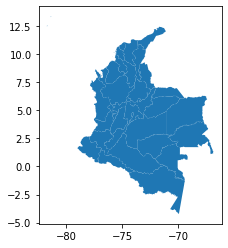

In [9]:
mapa.plot();

El método `plot` utiliza la librería `matplotlib` para renderizar las imágenes, es por esto que uno puede personalizar el resultado usando los comandos de esta librería.

La manipulación del objeto `mapa` se puede hacer como cualquier otro DataFrame, para acceder, filtrar, visualizar la información sobre cada uno de los individuos que se componen dentro de este objeto.

Las columnas contienen información sobre el código único de identificación de cada departamento, su año de creación, nombre oficial, acto de ley que lo crea y área, entre otros. 

Se puede generar el mapa asignando un color diferente a cada polígono (departamento en nuestro caso), a partir de la variable `DPTO_CCDGO` y a su vez filtrar la isla de San Andrés y visualizarla por aparte.

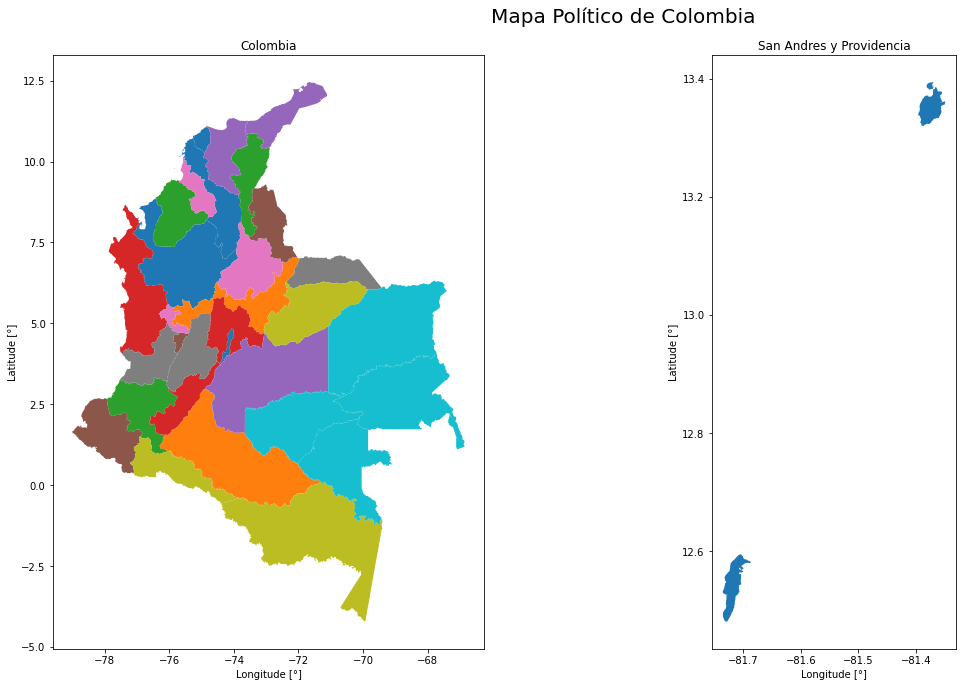

In [10]:
san_andres = mapa[mapa['DPTO_CNMBR']=='ARCHIPIELAGO DE SAN ANDRES']
colombia = mapa[mapa['DPTO_CNMBR']!='ARCHIPIELAGO DE SAN ANDRES']

fig, axs = plt.subplots(1,2,figsize=(20,10))

# Crear mapa colombia sin san andres
axs[0].set_title('Colombia')
colombia.plot(ax = axs[0], column = 'DPTO_CCDGO')
axs[0].set_xlabel('Longitude [°]')
axs[0].set_ylabel('Latitude [°]')

# Crear mapa San Andres y Providencia
axs[1].set_title('San Andres y Providencia')
san_andres.plot(ax = axs[1], column = 'DPTO_CCDGO')
axs[1].set_xlabel('Longitude [°]')
axs[1].set_ylabel('Latitude [°]')

plt.suptitle("Mapa Político de Colombia", fontsize=20)
fig.tight_layout(rect=[0, 0.03, 0.9, 0.95])
plt.show();

En general, no es fácil entender la dinámica geográfica de un fenómeno al observar los datos que lo representan, y es aquí donde los mapas son de gran utilidad. Por ejemplo, el archivo Delito.csv contiene información sobre homicidios en Colombia para el año 2016, según la información suministrada por el Instituto Nacional de Medicina Legal y Ciencias Forenses. Los datos se ven así:


In [11]:
import pandas as pd

delito = pd.read_csv('/content/cursotomadecisiones/datos/tema_3/Delito.csv', encoding = 'latin-1', sep = ';')
delito.head()

,OBJECTID,DPTO_CCDGO,DPTO_CNMBR,Nombre,Homicidios,Celulares,Poblacion,PIB,Alumnos,Policias
0,28,91,AMAZONAS,Amazonas,14,70.0,77088,608,2203,185
1,1,5,ANTIOQUIA,Antioquia,1611,8217.0,6534857,119946,138998,16374
2,25,81,ARAUCA,Arauca,94,178.0,265190,4545,5819,1060
3,33,88,ARCHIPIELAGO DE SAN ANDRES,San Andrés y Providencia,12,207.0,77101,1343,1476,185
4,2,8,ATLANTICO,Atlántico,575,2120.0,2489514,36211,66207,3804


Esta información puede ayudar a enteder cuál es el departamento más violento del país, a partir de la medida de homicidios. En primer lugar, al objeto `mapa` se le añadirá la información de homicidios mediante el comando [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html), utilizando la variable identificadora comó un OBJECTID. Luego se genera el mapa de homicidios en Colombia para el año 2016:

In [12]:
mapa = mapa.merge(delito, on='OBJECTID')

In [13]:
mapa['escala_color'] = (mapa['Homicidios']-(mapa['Homicidios'].min())) / ((mapa['Homicidios'].max())-(mapa['Homicidios'].min()))

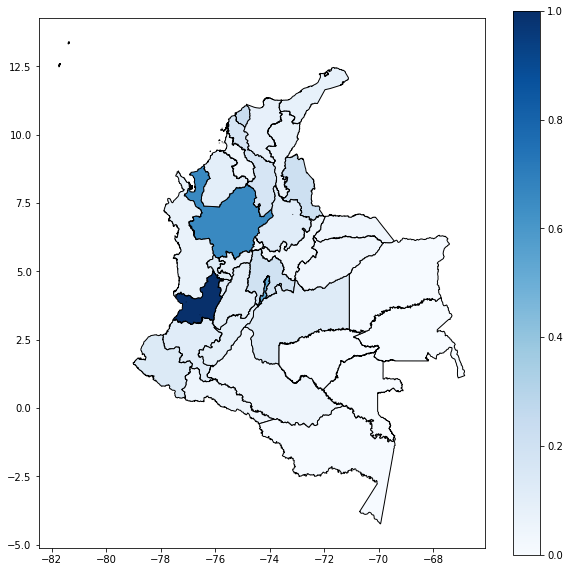

In [14]:
fig, axs = plt.subplots(1,1,figsize=(10,10))
mapa.plot(column = 'escala_color', cmap = 'Blues', edgecolor = 'k', legend = True, ax = axs);

Como se puede observar, Valle del Cauca, Antioquia y Bogotá presentan la mayor cantidad de homicidios.

Sin embargo, se debe considerar que estos son los departamnetos con la mayor cantidad de población en el país por lo cual, para responder mejor a la pregunta, se calcularán tasas de homicidio y se representarán de la misma forma que en los casos anteriores

In [15]:
mapa['tasa_100'] = mapa['Homicidios']/mapa['Poblacion']*100000
mapa['escala_color'] = mapa['tasa_100']/(max(mapa['tasa_100'])-min(mapa['tasa_100']))

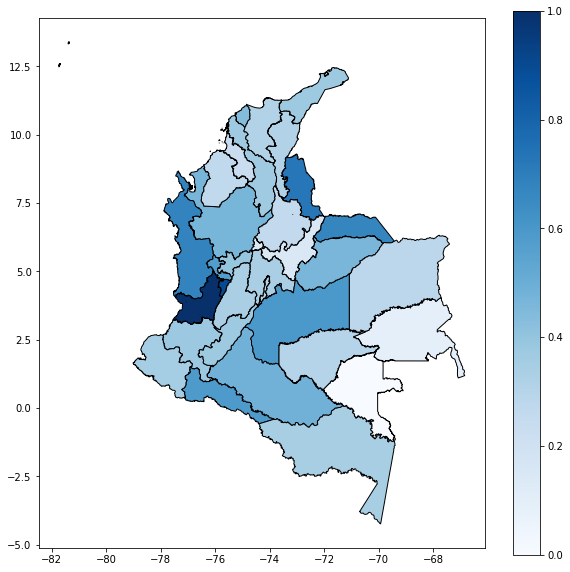

In [16]:
fig, axs = plt.subplots(1,1,figsize=(10,10))
mapa.plot(column = 'escala_color', cmap = 'Blues', edgecolor = 'k', legend = True, ax = axs);

De esta forma cambia el resultado, mostrando valores altos para los departamentos de Valle del Cauca, Quindío, Norte de Santander, Chocó, Arauca y Meta.

In [17]:
mapa[['DPTO_CNMBR_x','Homicidios','tasa_100']].sort_values('tasa_100', ascending = False).head()

,DPTO_CNMBR_x,Homicidios,tasa_100
23,VALLE DEL CAUCA,2445,52.459469
18,QUINDIO,269,47.317003
17,NORTE DE SANTANDER,522,38.166041
11,CHOCO,181,35.840449
24,ARAUCA,94,35.446284



GeoPandas cuenta con los parametros `scheme` y `k` para hacer automaticamente clasificar los poligonos en intervalos, el `scheme` puede ser en k-percentiles, k-intervalos del mismo tamaño y k-divisiones naturales (minimizan la varianza). 

Para nuestro ejemplo podemos clasificar por tercios la tasa de homicidios para asignar 3 Niveles: ALTO, MEDIO, BAJO.


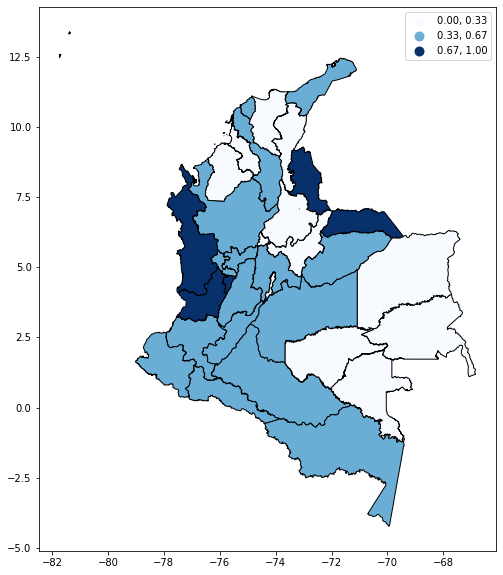

In [18]:
fig, axs = plt.subplots(1,1,figsize=(10,10))
mapa.plot(column = 'escala_color', scheme='equal_interval', k=3, cmap = 'Blues', edgecolor = 'k', legend = True, ax = axs);

A continuación se tomarán los datos del archivo Vivienda.csv, que corresponden a ubicaciones y precios de vivienda usada en la ciudad de Medellín. Debido a que para cada individuo se cuenta con su longitud y
latitud, se puede generar a partir de estos datos un mapa de puntos:

In [19]:
vivienda = pd.read_csv('/content/cursotomadecisiones/datos/tema_3/Vivienda.csv', sep = ';', decimal=',')
vivienda.head()

,longitud,latitud,precio
0,-75.572172,6.201524,919000000
1,-75.572172,6.201524,656370000
2,-75.556824,6.202339,1250000000
3,-75.599637,6.243573,470000000
4,-75.553635,6.203372,1250000000


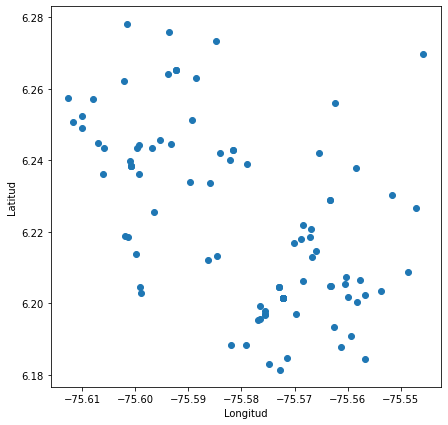

In [20]:
plt.figure(figsize=(7,7))
plt.scatter(x=vivienda['longitud'], y=vivienda['latitud'])
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

La representación espacial de esta información se realizará mediante la libreria `contextily` que tiene una integración nativa con `geopandas`, este paquete permite
añadir un mapa base que facilita la referenciación de la información. Para esto se utiliza el comando `add_basemap`. Adicionalmente, se especifican las opciones zoom = 13, el cual controla el acercamiento.

Por lo tanto, primero procederemos a crear un GeoDataFrame a partir de nuestro DataFrame especificando las columnas longitud y latitud para que se creen como una figura geométrica, en este caso puntos.

In [21]:
import contextily as cx
vivienda = gpd.GeoDataFrame(vivienda, geometry=gpd.points_from_xy(vivienda['longitud'], vivienda['latitud']))
vivienda.head()

,longitud,latitud,precio,geometry
0,-75.572172,6.201524,919000000,POINT (-75.57217 6.20152)
1,-75.572172,6.201524,656370000,POINT (-75.57217 6.20152)
2,-75.556824,6.202339,1250000000,POINT (-75.55682 6.20234)
3,-75.599637,6.243573,470000000,POINT (-75.59964 6.24357)
4,-75.553635,6.203372,1250000000,POINT (-75.55363 6.20337)


Una vez hemos creado nuestro GeoDataFrame debemos asignarle un sistema de coordenadas, dado que existen varias representaciones para proyectar puntos en un mapa.

Generalmente, los mapas Web están en un sistema de coordenadas 'Web Mercator' (EPSG 3857), pero nuestros datos están en ESPG 4326 (latitud y longitud), por lo que le asignamos a nuestro set de datos esa representación y transformamos al nuevo sistema de coordenadas para finalmente gráficar con `contextily` de la siguiente manera:

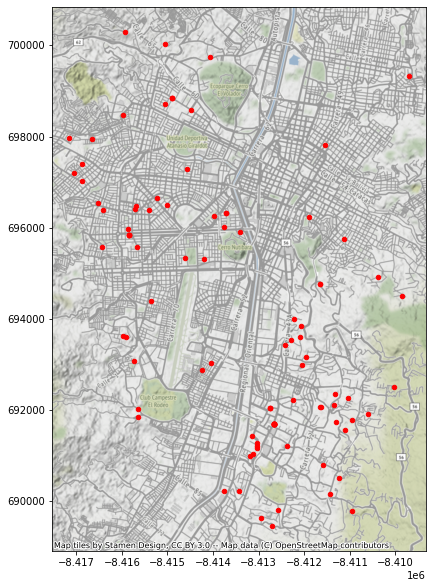

In [22]:
vivienda = vivienda.set_crs('epsg:4326', inplace= True)
vivienda = vivienda.to_crs(epsg=3857)

ax = vivienda.plot(figsize=(10, 10), color = 'r', markersize=20)
cx.add_basemap(ax)

Por último podemos asignar a cada punto un tamaño y color de acuerdo con su precio

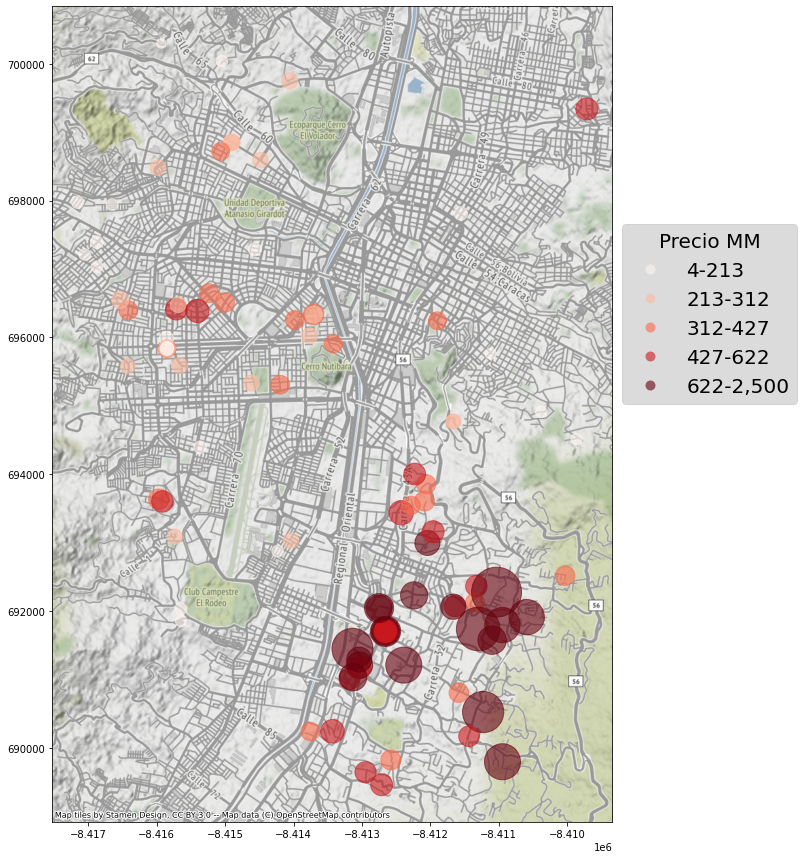

In [23]:
fig, ax = plt.subplots(figsize=(15,15))
scatter = vivienda.plot(column = 'precio', cmap='Reds', 
                   markersize=vivienda['precio']/1e6,
                   scheme="quantiles",
                   alpha=0.6, 
                   legend = True,
                   ax = ax,
                   legend_kwds={'fontsize':20,
                                'facecolor':'lightgrey',})
cx.add_basemap(scatter)

leg = ax.get_legend()

leg.set_title('Precio MM', prop = {'size':20})

leg._loc = 3
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0].replace(',','')
    upper = label_text.split()[1]
    new_text = f'{float(lower)/1e6:,.0f}-{float(upper)/1e6:,.0f}'
    lbl.set_text(new_text)

leg.set_bbox_to_anchor((1, 0.5, 0.1, 0))

A continuación, se considera la construcción de variables que capturan otras dimensiones del comportamiento espacial de cada individuo. Por ejemplo, al determinar una coordenada para el centro de la ciudad es posible calcular la distancia (euclidiana) de cada individuo mediante la fórmula 

<center>$distancia_{ij} = \sqrt{(longitud_{i}-longitud_{j})^2-(latitud{i}-latitud{j})^2}$</center>

donde $i$ y $j$ hacen referencia a dos puntos, representados en el espacio por su longitud y latitud. De esta forma, $i$ puede ser cada uno de los inmuebles mientas que $j$ es el centro de la ciudad. Para obtener la coordanda de una ciudad o dirección se puede usar `geopy`:

In [24]:
# import module
from geopy.geocoders import Nominatim
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")
ubicacion = geolocator.geocode("Medellin")
print(f'latitud: {ubicacion.latitude}, longitud: {ubicacion.longitude}')

latitud: 6.2443382, longitud: -75.573553


Ahora, es posible calcular la distancia de cada individuo al centro mediante:

In [25]:
vivienda['dist_centro'] = np.sqrt(np.square((vivienda['longitud']- ubicacion.latitude))
                                     + np.square((vivienda['longitud']- ubicacion.longitude)))

Esta nueva variable puede utilizarse en una estrategia de modelamiento más avanzada, como las que buscan generar grupos naturales en los datos, identificar observaciones atípicas o predecir alguna caraterística que bajo circusntancias determinadas es no observada para un grupo de individuos.

Para finalizar, cuando se usa información espacial generalmente se trabaja con múltiples capas y aprovechando una herramienta que permite interacción como un notebook, permite profundizar en la información y detalle.  

`Plotly` es una de las herramientas más populares en Python que permite ser desplegada en notebooks e incluso páginas web, a continuación se da un ejemplo en donde se pretende capturar todos los puntos de atención de las oficinas de EPM en Antioquia.

Primero, cargamos los polígonos de Antioquia de la siguiente manera:

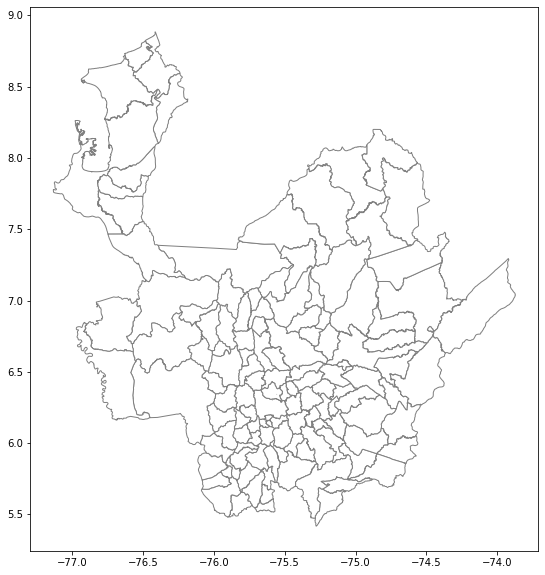

In [26]:
antioquia = gpd.read_file("/content/cursotomadecisiones/datos/tema_3/Medellín/MGN_ADM_MPIO_GRAFICO.shp")

fig, ax = plt.subplots(figsize = (10,10))
base = antioquia.plot(color='white', edgecolor='grey', ax = ax)

Una vez hemos cargado los polígonos, cargamos las Oficinas de atención al cliente de EPM en Antioquia [datos recuperados de datos abiertos](https://www.datos.gov.co/Funci-n-p-blica/Oficinas-de-atenci-n-al-cliente-EPM-Antioquia-/e3dj-zguu) y podemos poner esa capa de puntos sobre el polígono que visualizamos previamente

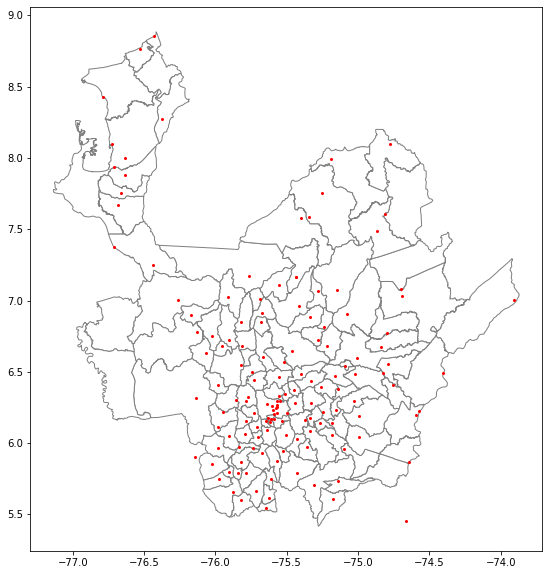

In [27]:
oficinas_epm = pd.read_csv('/content/cursotomadecisiones/datos/tema_3/Oficinas_de_atenci_n_al_cliente_-_EPM._Antioquia..csv')
oficinas_epm = gpd.GeoDataFrame(oficinas_epm, geometry=gpd.points_from_xy(oficinas_epm['Longitud'], oficinas_epm['Latitud']))

fig, ax = plt.subplots(figsize = (10,10))
base = antioquia.plot(color='white', edgecolor='grey', ax = ax)
oficinas_epm.plot(ax=base, marker='o', color='red', markersize=4);

Como la información parece consistente, procedemos a graficar usando `plotly`.

In [ ]:
import plotly.express as px
import json

fig = px.scatter_mapbox(oficinas_epm, lat="Latitud", lon="Longitud", hover_name="Dirección Oficina", hover_data=["Región", "Localidad"],
                        color_discrete_sequence=["fuchsia"], zoom=8, height=500, center = {'lat':ubicacion.latitude, 
                                                                                            'lon':ubicacion.longitude},
                        ).update_traces(marker={"size": 15})

fig.update_layout(mapbox={"style": "open-street-map",
                          "zoom": 9,
                          "center": {'lat':6.16372275,  'lon':-75.71936312},
                          "layers": [{
                                "source": json.loads(antioquia.geometry.to_json()),
                                "below": "traces",
                                "type": "line",
                                "color": "purple",
                                "line": {"width": 1.5},
                                }],})

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show();

Es posible continuar añadiendo capas dado que `fig.update_layour` acepta dentro de `layers` una lista de objetos. Estos pueden ser formato GeoPackage, GeoJSON o ShapeFile. 

### 3.1.1. Otros recursos

https://geopandas.org/en/stable/getting_started/introduction.html
https://geopandas.org/en/stable/gallery/plotting_basemap_background.html
https://developers.arcgis.com/python/guide/using-the-gis/
https://plotly.com/python/scattermapbox/
https://matplotlib.org/stable/tutorials/index.html



## 3.2. Análisis de regresión lineal

La regresión lineal es uno de los métodos estadísticos más populares. Aunque puede utilizarse para
predecir situaciones no observadas apartir de información conocida (como en el caso del pronóstico de una serie de tiempo o para predecir la situación de un individuo nuevo), su fortaleza radica en las posibilidades que ofrece para la descripción de situaciones, haciendo énfasis en la asociación e incluso causalidad entre variables.

De manera más detallada, mediante el modelo de regresión se pueden resolver preguntas como las siguientes:

* Existe una relacion entre un grupo de variables?
* Si existe, qué tan fuerte es esta relación?
* Qué tan preciso es el efecto calculado de una variable sobre otra?
* Qué tan preciso es el cálculo de valores no observados a partir de información conocida?
* Qué forma toma la relación entre un grupo de variables?

El modelo de regresión lineal (múltiple) se describe como:

<center>$Y = β_0+β_1 X_1+β_2 X_2...+β_p X_p+$ </center>

donde cualquiera de las $X$ y $Y$ son variables aleatorias, $X_j$ representa el j-esimo predictor y $β_j$ es un parámetro poblacional que mide el efecto promedio sobre $Y$ causado por un incremento de una unidad en $X_j$, manteniendo todas las demás variables constantes.

En la práctica, normalmente no se cuenta con toda la información de la $población^1$ sino únicamente con una muestra de individuos que se espera sea representativa.

> $^1$Con la tendencia reciente de proliferación acelerada de información (fenómeno del Big Data) es cada vez más factible pensar en que se dispone de toda la información. Sin embargo, en la práctica, es muy difícil contar con datos para cada uno de los individuos de interés, con lo cual se siguen manejando muestras, eso sí, cada más grandes

En este caso, los valores poblacionales de $β$ no se conocen y se deben reemplazar por estimaciones (muestrales) $\hatβ$, con lo cual se obtiene la ecuación de regresión lineal múltiple:

<center>$Y = \hat{β_0}+\hat{β_1} X_{i1}+\hat{β_2} X_{i2}+...+\hat{β_p} X_{ip} +\hat{\epsilon_i}  $</center>

donde cualquiera de las $X$ y $Y$ son realizaciones de variables aleatorias, $X_{ij}$ representa la realización del j-esimo predictor para el individuo $i$ y $\hat{β_j}$ es una estimación del verdadero parámetro poblacional $β_j$. Para llegar a $\hat{β_j}$ se resuelve el problema de minimización de los errores (poblacionales) al cuadrado:

<center>$\min_{β} {\epsilon^2_1}+{\epsilon^2_2}+...+{\epsilon^2_N} $</center>

donde $\epsilon_i = Y_i - β_0 - β_1 X_{i1} - β_2 X_{i2} - ... - β_p X_{ip}$ Resolviendo el problema de optimización mediante cálculo matricial se encuentra:

<center>$β = (X'X)^{-1}X'Y$</center>

Los coeficientes estimados tienen un error asociado que se relaciona con su precisión: entre mayor sea el error de estimación, menor sería la precisión del coeficiente, y viceversa. Así mismo, este error se puede utilizar para generar estadísticas que permiten validar hipótesis que se tengan sobre los coeficientes de regresión. En este caso, la hipótesis más común es $H_0 : β_j = 0$ versus $H_a : β_j \neq 0$ que, en otras palabras, prueba si la variale $X_j$ tiene una relación *estadísticamente significativa* con la variable $Y$ . Adicionalmente, para que la
estimación de $β$ sea válida, se requiere que $E(X_ϵ) = 0$.

A partir de la información sobre hurto de celulares en Colombia, se utilizará la regresión lineal para establecer el efecto que tienen diferentes variables socioeconómicas sobre este indicador. Una vez más, se carga el archivo Delito.csv mediante el comando:

In [29]:
delito = pd.read_csv('/content/cursotomadecisiones/datos/tema_3/Delito.csv', sep = ';', decimal = ',', encoding='latin-1')
delito.columns

Index(['OBJECTID', 'DPTO_CCDGO', 'DPTO_CNMBR', 'Nombre', 'Homicidios',
       'Celulares', 'Poblacion', 'PIB', 'Alumnos', 'Policias'],
      dtype='object')

El comando columns extrae los nombres de las variables que contiene el objecto delito. Para nuestro
caso, utilizaremos el producto interno bruto (PIB) y una medida de escolaridad (Alumnos) como posibles determinantes de los hurtos de celulares en Colombia. En particular, el PIB viene dado en miles de millones de pesos mientras que el indicador educativo se refiere a la cantidad de estudiantes activos. El diagrama de dispersión entre las variables se obtiene mediante:

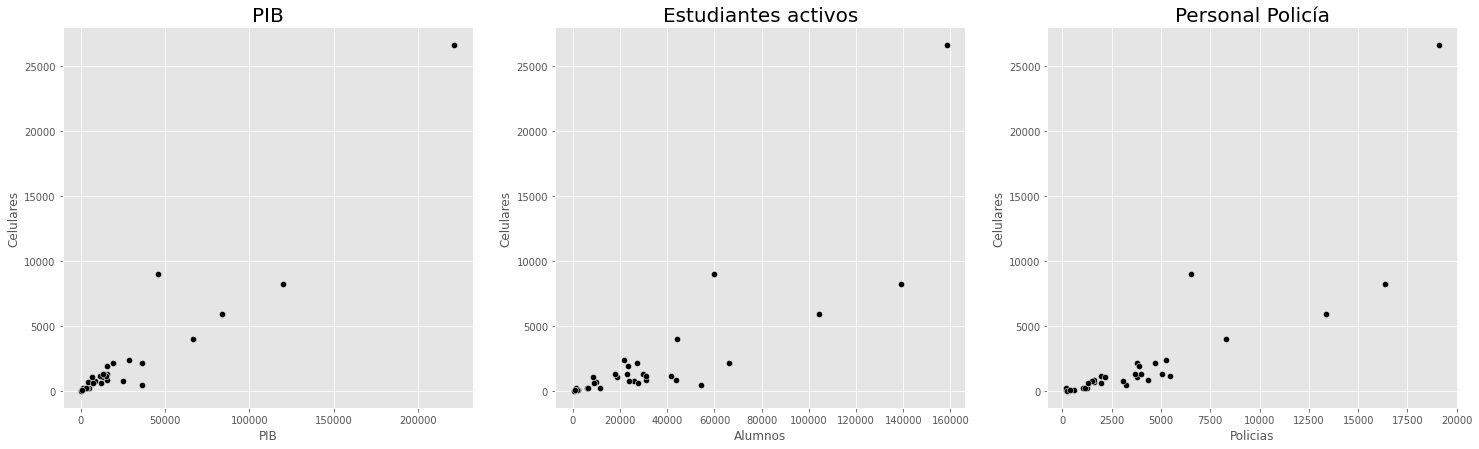

In [30]:
import seaborn as sns
plt.style.use('ggplot')

columnas_a_graficar = ['PIB', 'Alumnos', 'Policias']
titles = ['PIB','Estudiantes activos', 'Personal Policía']

fig, axs = plt.subplots(1, 3, figsize=(25,7))
for col, ax, title in zip(columnas_a_graficar, axs.flatten(), titles):
    b = sns.scatterplot(y = 'Celulares', x = col, data = delito, ax = ax, s=40, color='black')
    b.axes.set_title(f'{title}', fontsize=20)

Un primer intento por explicar el hurto de celulares como funcion de la producción econòmica y la educación, mediante un modelo de regresión lineal múltiple, es:

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

regresion = smf.ols('Celulares ~ PIB + Alumnos + Policias', data=delito).fit()
regresion.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Intercept    262.748835
PIB            0.152169
Alumnos       -0.033139
Policias      -0.209970
dtype: float64

El resultado obtenido es, como mínimo, escaso, pero esto no signifíca que no se hayan calculado otras estadísticas como valores t calculados, valores p, coeficientes de correlación $R$ y de determinación $R^2$, etc.

Para acceder a una salida mucho más informativa, se utiliza el comando summary:

In [32]:
print(regresion.summary())

                            OLS Regression Results                            
Dep. Variable:              Celulares   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           3.91e-15
Time:                        02:26:07   Log-Likelihood:                -277.54
No. Observations:                  32   AIC:                             563.1
Df Residuals:                      28   BIC:                             568.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    262.7488    422.965      0.621      0.5

In [33]:
pd.DataFrame(regresion.resid.describe()).T

,count,mean,std,min,25%,50%,75%,max
0,32.0,3.092637e-12,1436.504046,-3221.854997,-399.395953,-51.134479,520.888294,5089.354871


En este caso, el hurto de celulares solo muestra una relación positiva, estadísticamente significativa, con el PIB, como se extrae de los valores $p$ calculados para cada coeficiente. Ahora, del mismo ejercicio pero con tasas por cada 100.000 habitantes y producción por persona resulta:

In [34]:
delito['cel100'] = delito['Celulares']/delito['Poblacion']*100_000
delito['pib_pc'] = delito['PIB']/delito['Poblacion']
delito['pib_pc_2'] = np.square(delito['pib_pc'])
delito['alum100'] = delito['Alumnos']/delito['Poblacion']*100_000
delito['alum100_2'] = np.square(delito['alum100'])
delito['pol100'] = delito['Policias']/delito['Poblacion']*100_000
delito['pol100_2'] =  np.square(delito['pol100'])

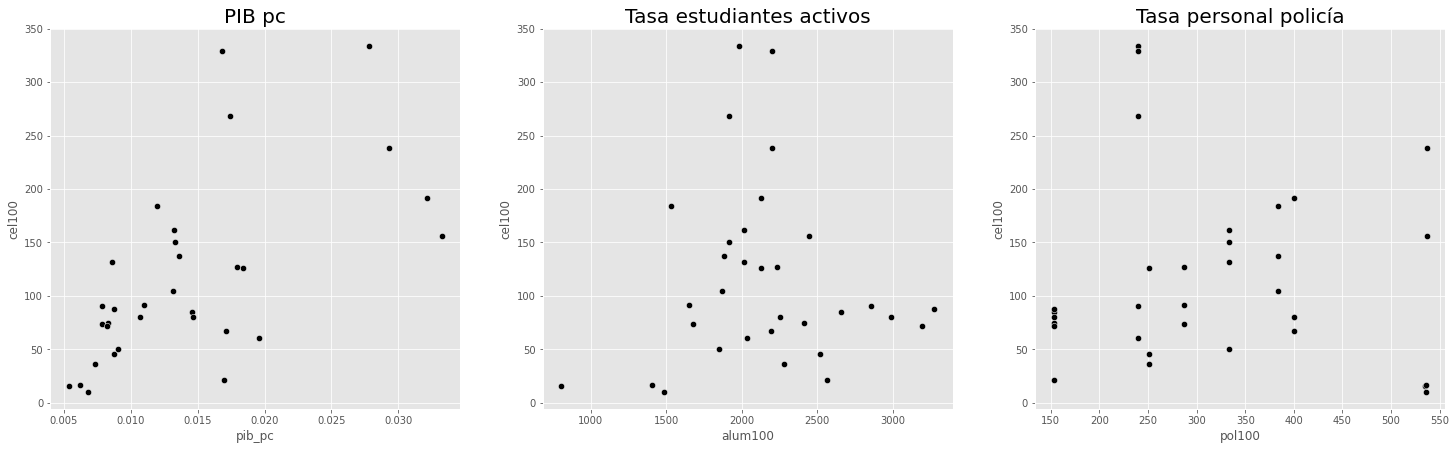

In [35]:
columnas_a_graficar = ['pib_pc', 'alum100', 'pol100']
titles = ['PIB pc', 'Tasa estudiantes activos', 'Tasa personal policía']

fig, axs = plt.subplots(1, 3, figsize=(25,7))
for col, ax, title in zip(columnas_a_graficar, axs.flatten(), titles):
    b = sns.scatterplot(y = 'cel100', x = col, data = delito, ax = ax, s=40, color='black')
    b.axes.set_title(f'{title}', fontsize=20)

In [36]:
regresion = smf.ols('cel100 ~ pib_pc + alum100 + pol100', data=delito).fit()
print(regresion.summary())

                            OLS Regression Results                            
Dep. Variable:                 cel100   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     7.628
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           0.000705
Time:                        02:26:08   Log-Likelihood:                -177.19
No. Observations:                  32   AIC:                             362.4
Df Residuals:                      28   BIC:                             368.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    186.7729     96.125      1.943      0.0

In [37]:
pd.DataFrame(regresion.resid.describe()).T

,count,mean,std,min,25%,50%,75%,max
0,32.0,6.548469e-09,62.43352,-133.167453,-35.643586,-20.266411,38.36101,177.856422


En este caso, la transformación de las variables de niveles absolutos a tasas y valores por persona revela que solo hay una relación lineal entre el hurto de celulares y el PIB. Ahora, al observar los diagrama de dispersión correspondientes, se pueden extraer ciertas relaciones no lineales entre las tasa de hurto de celulares y las demás variables explicativas, justifícando el ajuste un modelo con términos no lineales:

In [38]:
regresion = smf.ols('cel100 ~ pib_pc + pib_pc_2 + alum100 + alum100_2 + pol100 + pol100_2', data=delito).fit()
print(regresion.summary())

                            OLS Regression Results                            
Dep. Variable:                 cel100   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     4.059
Date:                Tue, 16 Nov 2021   Prob (F-statistic):            0.00563
Time:                        02:26:09   Log-Likelihood:                -175.86
No. Observations:                  32   AIC:                             365.7
Df Residuals:                      25   BIC:                             376.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.8246    194.143      0.262      0.7

In [39]:
pd.DataFrame(regresion.resid.describe()).T

,count,mean,std,min,25%,50%,75%,max
0,32.0,-0.000006,59.901208,-121.420425,-30.96613,-10.045132,29.134599,175.341387


La situación empeora. En este caso, dos de los coeficientes asociados a los indicadores lineales tienen signo positivo, mientras que los coeficiente correspondientes estimados para las variables al cuadrado tienen signo negativo trazando, en suconjunto, parábolas como se ve a continuación para el caso del PIB:

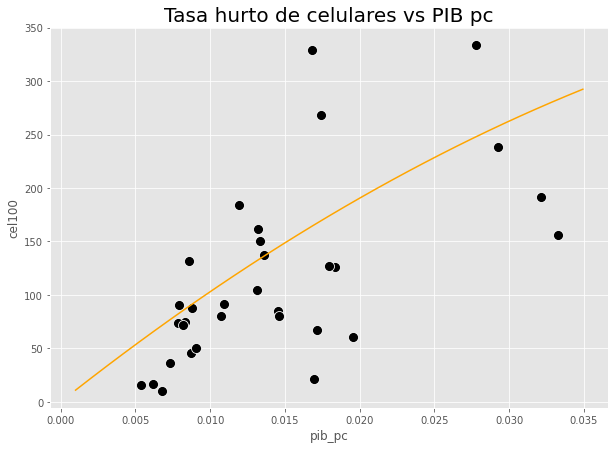

In [40]:
fig, axs = plt.subplots(1, 1, figsize=(10,7))
b = sns.scatterplot(y = 'cel100', x = 'pib_pc', data = delito, ax = axs, s=100, color='black')
b.axes.set_title('Tasa hurto de celulares vs PIB pc', fontsize=20)
seq = np.arange(0.001,0.035,0.035/delito.shape[0])
axs.plot(seq, seq*regresion.params[1] + np.square(seq)*regresion.params[2] , color = 'orange');

### 3.3. Análisis de regresión espacial

Con la estimación de la ecuación de regresión no sólo se obtienen coeficientes sino también $residuales^1$, definidos como $y_i - \hat{y_i}$, con $\hat{y_i} = \hat{β_0} + \hat{β_1}X_{1i} + \hat{β_2}X_{2i}+ ... + \hat{β_p}X_{pi}$. Estos residuales pueden representarse espacialmente, obteniendo:

> 1: Este es el nombre que se le da a la estimación de los errores de la regresión.

In [41]:
delito['residuales'] = regresion.resid
mapa = gpd.read_file("/content/cursotomadecisiones/datos/tema_3/Colombia/COLOMBIA.shp")
mapa = mapa.merge(delito, on='OBJECTID')

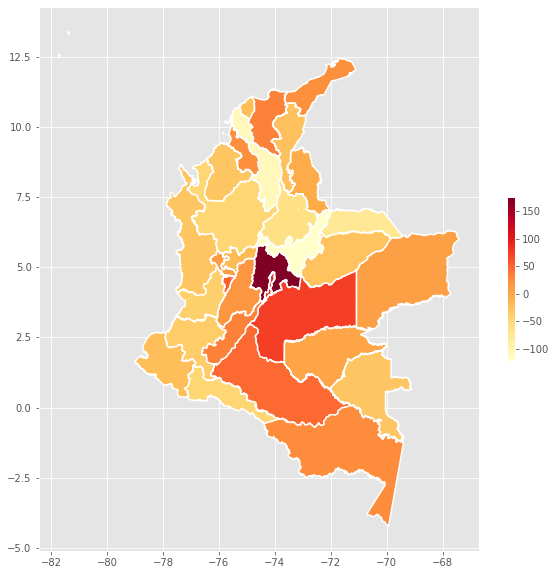

In [42]:
mapa.plot(column='residuales', legend = True, legend_kwds = {'shrink': 0.3},
          figsize = (10,10), cmap = 'YlOrRd', linewidth= 1.5, edgecolor='white');

Ahora, si se observa algún patrón geográfico en la distribución de los residuales es indicio de la necesidad de un modelo que capture la dinámica espacial de las observaciones, como en la regresión espacial.

Para finalizar, hablaremos de la autocorrelación espacial, y la definiremos como una medida de qué tan parecidos son dos individuos en función de qué tan cerca (en el espacio) se encuentran. Para su medición debemos contar con un objeto de referencia espacial (mapa) y una medida de cercanía como, por ejemplo, la contigüidad:

In [43]:
from libpysal.weights import Rook

mapa = mapa.set_crs('epsg:4326', inplace= True)
mapa = mapa.to_crs(epsg=3857)

w_rook = Rook.from_dataframe(mapa)

/usr/local/lib/python3.7/dist-packages/libpysal/weights/_contW_lists.py:31: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/usr/local/lib/python3.7/dist-packages/libpysal/weights/_contW_lists.py:29: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning:

The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 32.



In [44]:
total_len_w = [len(val) for val in w_rook.neighbor_offsets.values()]
min_w = np.min(total_len_w[total_len_w != 0])
max_w = np.max(total_len_w)

print(f'Número de regiones: {w_rook.n}')
print(f'Máximo número de vecinos: {w_rook.max_neighbors}')
print(f'Mínimo número de vecinos: {w_rook.min_neighbors}')
print(f'Número de vecinos promedio: {w_rook.mean_neighbors}')
print(f'Número de links diferentes de 0: {w_rook.nonzero}')
print(f'Porcentaje de links no 0: {w_rook.pct_nonzero}')
print(f'ID de las islas {w_rook.islands}')

print(f'\nRegiones menos conectadas con un mínimo de {min_w} conexiones:')
for k, val in w_rook.neighbor_offsets.items():
    if len(val) == min_w:
        print(k)

print(f'\nRegiones más conectadas con un máximo de {max_w} conexiones:')
for k, val in w_rook.neighbor_offsets.items():
    if len(val) == max_w:
        print(k)

Número de regiones: 33
Máximo número de vecinos: 7
Mínimo número de vecinos: 0
Número de vecinos promedio: 4.363636363636363
Número de links diferentes de 0: 144
Porcentaje de links no 0: 13.223140495867769
ID de las islas [32]

Regiones menos conectadas con un mínimo de 2 conexiones:
1
13
16
21

Regiones más conectadas con un máximo de 7 conexiones:
0
3
4
6
15
22


En este caso, el comando Rook toma un objeto espacial de polígonos y lo convierte en un objeto que indica cuál departamento limita con cuál(es) departamento(s). 

Visualmente se tiene:

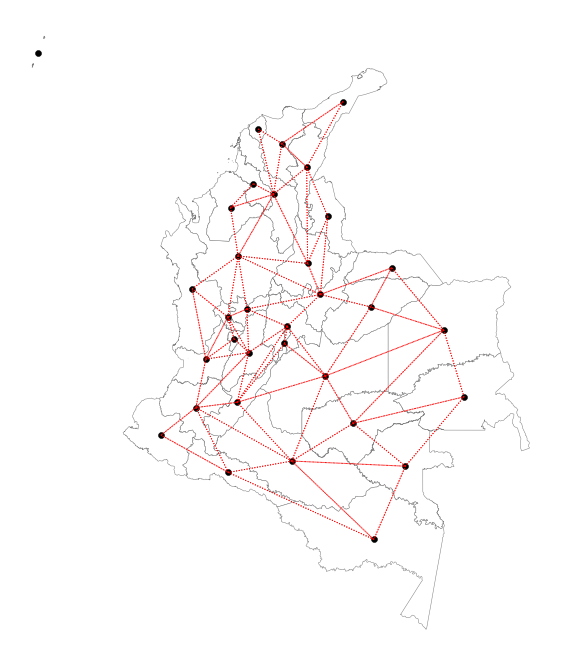

In [45]:
ax = mapa.plot(edgecolor='grey', facecolor='w', figsize = (12,12))
f,ax = w_rook.plot(mapa, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker='o'))
ax.set_axis_off();

A continuación se transforma $w$ en una matriz de pesos espaciales, la cual refleja la intensidad de las relaciones espaciales entre los individuos:

In [46]:
Wmatrix, ids = w_rook.full()
pd.DataFrame(Wmatrix).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Una medida que se suele utilizar para medir la autocorrelacion espacial es la $I$ de $Moran^1$, que se calcula de la siguiente forma:

> 1: Existen otras medidas como la C de Geary y el semivariograma.

<center>$I = \frac{N}{\sum_{i=1}^{N} (y_i-\overline{y})^2} \frac{\sum_{i=1}^N \sum_{i=1}^N w_{ij} (y_i-\overline{y}) (y_i-\overline{y})}{\sum_{i=1}^N w_{ij}} $</center>

In [47]:
from esda.moran import Moran

mapa['cel100'] = mapa['cel100'].fillna(0)
mapa['residuales'] = mapa['residuales'].fillna(0)
moran = Moran(mapa['cel100'].values, w_rook)

('WARNING: ', 32, ' is an island (no neighbors)')


In [48]:
def reporte_moran(moran):
    print(f'Moran I statistic : {moran.I}')
    print(f'Moran Expectation : {moran.EI}')
    print(f'Moran Variance : {moran.VI_rand}')
    print(f'Moran Variance : {moran.p_rand}')

reporte_moran(moran)

Moran I statistic : 0.38783713839137207
Moran Expectation : -0.03125
Moran Variance : 0.012480356098180835
Moran Variance : 0.00017586522039758634


In [49]:
moran = Moran(mapa['residuales'].values, w_rook)
reporte_moran(moran)

Moran I statistic : 0.27726533492750016
Moran Expectation : -0.03125
Moran Variance : 0.012302741349161839
Moran Variance : 0.005411180623264844


La prueba se realiza por simulación de Monte Carlo y bajo el supuesto de normalidad, cambian los argumentos para obtener un resultado u el otro. En nuestro caso trabajamos con simulación de Monte Carlo (rand). De acuerdo con los resultados, la tasa de hurto de celulares muestra autocorrelación espacial, mientras que los residuales del modelo de regresión lineal no.




### 3.4. Other resources

https://courses.spatialthoughts.com/python-foundation.html

## 4. Redes Complejas

Desde hace algunos años se ha venido popularizando el uso de redes sociales, donde los individuos se identifican por sus características, y se interrelacionan con otros individuos de maneras muy diferentes: mediante mensajes, *likes*, toques, como seguidores, etc. 

En todos estos casos se genera información que diferente a la que se suele manejar en la mayoría de contextos. A esta información la llamaremos relacional o de relaciones. Aquí, es importante considerar que este tipo de datos no es exclusivo de las redes sociales sino que se genera
en la mayoría de las industrias y campos de la ciencia.

En el análisis de redes se tienen dos elementos principales:

* Nodos (o vértices): son individuos que generan relaciones.
* Bordes: son las relaciones generadas por los nodos.

Estos dos tipos de elementos nos permitirán construir nuestra estructura de red. Adicionalmente, a partir de ellos se construirán diferentes estadísticas que aportan información sobre los individuos, sus relaciones y la red como un todo.

En nuestro caso, trabajaremos información bancaria correspondiente a transacciones donde un individuo le transfíere a otro individuo. La información se encuentra en el archivo *Transacciones.csv*. Inicialmente, cargamos el archivo y vemos sus primeras observaciones:

In [50]:
trans = pd.read_csv('/content/cursotomadecisiones/datos/tema_3/Transacciones.csv', sep = ';', decimal = ',', encoding='latin-1')
trans.head()

,IndividuoA,IndividuoB,Id,Tipo,Valor,Fecha,Oficina,Municipio
0,99347663231,78922484448,205,8,44471,24/12/1984,283,406375
1,99347671880,78982368282,214,8,37569,24/12/1984,233,374040
2,99347671880,79015193233,215,8,37593,24/12/1984,233,374040
3,99347671880,79013042136,216,8,37470,18/12/1984,256,374040
4,99347671880,90310563439,217,8,39851,22/12/1984,282,374040


Los campos `IndividuoA` y `IndividuoB` se refieren a las dos contrapartes que intervienen en cada transacción; `Id` es el identificador de transacciones; cuando Tipo es 5 es una transacción de A hacia B, mientras que Tipo igual a 8 es un movimiento en el sentido contrario; `Valor` es el valor de la transacción; `Fecha` es la fecha de la transacción; Oficina hace referencia al lugar donde ocurre la transacción; y `Municipio` es el municipio donde se ubica la oficina. Ahora, algunas estadísticas descriptivas sobre los datos:

In [62]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   IndividuoA  870 non-null    int64 
 1   IndividuoB  870 non-null    int64 
 2   Id          870 non-null    int64 
 3   Tipo        870 non-null    int64 
 4   Valor       870 non-null    int64 
 5   Fecha       870 non-null    object
 6   Oficina     870 non-null    object
 7   Municipio   870 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 54.5+ KB


In [80]:
len(set(trans['IndividuoA'])|set(trans['IndividuoB']))

929

In [63]:
trans['Valor'].describe()

count      870.000000
mean     39264.931034
std       4394.620021
min      11072.000000
25%      37848.000000
50%      39294.000000
75%      41441.750000
max      52467.000000
Name: Valor, dtype: float64

In [64]:
trans['Oficina'].nunique()

174

In [65]:
trans['Municipio'].nunique()

255

Utilizaremos el paquete **networkx** para el procesamiento de la información. Aquí, necesitamos reorganizar los datos en dos conjuntos, uno de ellos sobre individuos y el otro sobre sus relaciones. En ambos casos se pueden añadir características adicionales según sea el caso. El elemento de nodos debe tener, como mínimo, una columna con las identificaciones de los individuos. 

Por su parte, el elemento de bordes tiene dos columnas, la primera de ellas con la identificación de la parte y la segunda con la identificación de la contraparte en la relación:

In [113]:
nodos = pd.Series(pd.unique(trans[['IndividuoA','IndividuoB']].values.ravel())).sort_values()

bordes = pd.DataFrame({'origen': pd.concat([trans[(trans['Tipo']==5)]['IndividuoA'], trans[(trans['Tipo']==8)]['IndividuoB']]),
                       'destino': pd.concat([trans[(trans['Tipo']==8)]['IndividuoA'], trans[(trans['Tipo']==5)]['IndividuoB']])})

print(len(nodos) == len(nodos.unique()))

print(bordes.shape[0] == len(set(bordes['origen'])|set(bordes['destino'])))

True
False


Por su construcción, no hay individuos repetidos en el elemento nodos, contrario a lo que sucede con el elemento bordes. Entonces, se pueden reducir los bordes para que contenga
combinaciones únicas:

In [129]:
bordes.shape[0]

870

In [131]:
bordes.drop_duplicates().shape[0]

787

El comando `drop_duplicates` hace la tarea pero pierde información que puede ser valiosa sobre la cantidad de combinaciones que se repiten. Ahora, se utiliza el paquete networkx y la función from_pandas_edgelist, que requiere como mínimo la información de bordes:

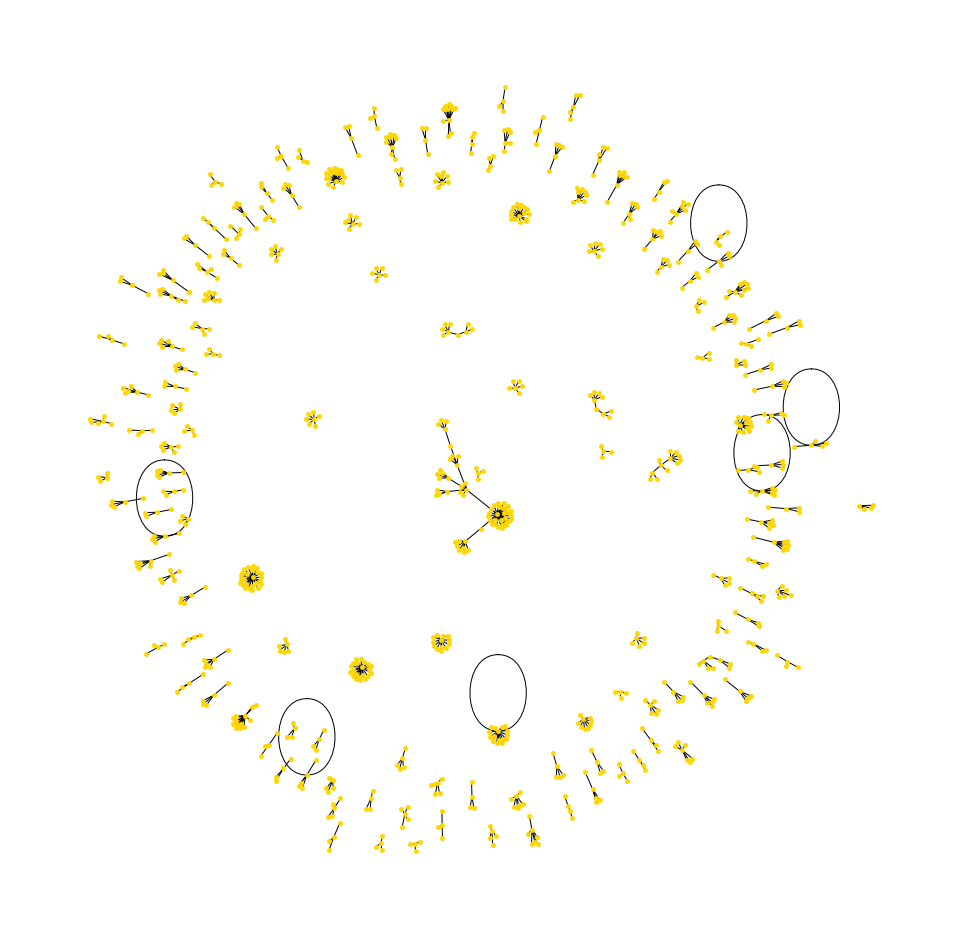

In [152]:
import networkx as nx

G = nx.from_pandas_edgelist(bordes, 'origen', 'destino')

options = {
    'node_size': 20,
     'node_color':'gold', 
     'linewidths': 0.5,
}

fig = plt.figure(figsize=(17, 17))
ax = plt.subplot(111)
nx.draw(G, **options)

En este caso se uso la función `draw` que genera de manera automática la ubicación de cada nodo intentandolo separar de los grupos con los que no tiene relación. Adicionalmente, se pueden utilizar las funciones `draw_circle`, `draw_kamada_kawai`, `draw_planar` y [otros](https://networkx.org/documentation/stable/reference/drawing.html)

Las funciones `edges` y `nodes` generan una lista de los bordes y nodos, respectivamente:

In [154]:
G.edges

EdgeView([(78922484448, 99347663231), (78922484448, 99498421148), (78922484448, 79451631546), (78922484448, 99090250242), (78922484448, 99090331937), (78922484448, 99095563792), (78922484448, 99095569259), (78922484448, 99500240676), (78982368282, 99347671880), (99347671880, 79015193233), (99347671880, 79013042136), (99347671880, 90310563439), (99347671880, 79046301607), (78992769503, 99498399794), (99498399794, 69997210088), (99498399794, 78875688179), (99498399794, 76086550749), (99498399794, 76402536143), (70327173826, 99498421148), (99498421148, 78637998100), (99498421148, 71944550968), (99498421148, 78506938347), (78994482768, 99498427766), (99498427766, 71220303702), (99498427766, 94843234476), (79457571600, 79454822230), (79457571600, 79456896673), (79457571600, 79455037755), (79457571600, 90523338738), (73946238562, 99493906057), (99493906057, 68781511597), (99493906057, 70229280658), (99494388193, 69161923783), (99494388193, 68382660633), (99494388193, 69444068739), (994943881

In [156]:
G.nodes

NodeView((78922484448, 99347663231, 78982368282, 99347671880, 79015193233, 79013042136, 90310563439, 78992769503, 99498399794, 69997210088, 78875688179, 76086550749, 76402536143, 70327173826, 99498421148, 78637998100, 78994482768, 99498427766, 71220303702, 94843234476, 79451631546, 79457571600, 79454822230, 79456896673, 79455037755, 90523338738, 73946238562, 99493906057, 68781511597, 70229280658, 99494388193, 69161923783, 68382660633, 69444068739, 90346183750, 78560655295, 99494389363, 68076900251, 99494391435, 59719293278, 76125553050, 99498686425, 71862192139, 99498689245, 73308973402, 78993052175, 78501980797, 90583634333, 79753924552, 99498703325, 71836575125, 65318500370, 75931918554, 75126725470, 78922195630, 78556180563, 76430609590, 90203692414, 78714495495, 99494397056, 75720324394, 76022810647, 77148256872, 78460947915, 76449726352, 99494405013, 76396952555, 99090250242, 57212697801, 90486514595, 99201274756, 78985492274, 78985407154, 90243213856, 69787260315, 79202421007, 70

La información en estructura de red no solo sirve para facilitar la visualización de los individuos y sus relaciones, sino que también permite calcular indicadores de conectividad. Uno de los más básicos es el grado, que corresponde a la cantidad de conexiones que tiene un nodo. Para calcular este indicador utilizaremos la función `degree`:

In [164]:
pd.DataFrame(G.degree(), columns=['Individuo','NConex']).sort_values('NConex', ascending=False)

,Individuo,NConex
254,99095563792,29
371,99499266807,24
316,99031018106,20
321,99193466084,17
325,99543444586,15
...,...,...
351,75582320645,1
353,66932510221,1
354,90504581738,1
356,79662072736,1
